In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# array identidad 5x5
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
url = "https://raw.githubusercontent.com/suraggupta/coursera-machine-learning-solutions-python/master/Exercise1/Data/ex1data1.txt"
data = np.loadtxt(url,delimiter=",")
data[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In [4]:
X,y=data[:,0],data[:,1]

In [5]:
def plotData(X,y):
    plt.figure(figsize=(8,6))
    plt.plot(X,y,"ro",ms=10,mec="k")
    plt.xlabel("profit in 10.000$")
    plt.ylabel("population")
    plt.title("relacion poblacion beneficio")

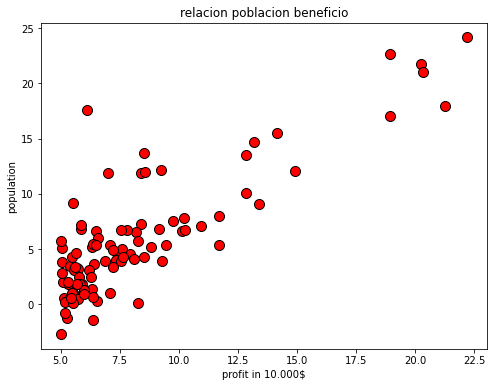

In [6]:
plotData(X,y)

In [7]:
import statsmodels.api as sm
X_constante= sm.add_constant(X,prepend=False)
mod = sm.OLS(y,X_constante)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.02e-26
Time:                        18:56:58   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1930      0.080     14.961      0.000       1.035       1.351
const         -3.8958      0.719     -5.415      0.000      -5.324      -2.467
==============================================================================
Omnibus:                       39.986   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           1.455   Prob(JB):                     3.29e-24
Kurtosis:                       7.276   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
res.params

array([ 1.19303364, -3.89578088])

In [9]:
res.pvalues

array([1.02320998e-26, 4.60788665e-07])

In [10]:
data_predict = res.predict(X_constante)

Text(0.5, 1.0, 'relacion poblacion beneficio')

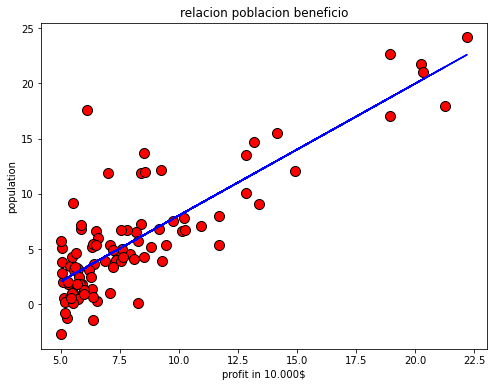

In [11]:
plt.figure(figsize=(8,6))
plt.plot(X,y,"ro",ms=10,mec="k")
plt.plot(X,data_predict,color="blue",linestyle="-")
plt.xlabel("profit in 10.000$")
plt.ylabel("population")
plt.title("relacion poblacion beneficio")

### gradient descent

In [12]:
m = y.size

In [13]:
# añadimos primero una columnna a x
X = np.stack([np.ones(m),X],axis=1)

In [14]:
# creamos una funcion de coste
def computeCost(X,y,theta):
    m = y.size
    h = np.dot(X,theta)
    # funcion coste
    j = (1/(2*m)) * np.sum(np.square(h - y))
    return j

In [15]:
# recordara que theta son los parametros de la funcion 00 y 01
J = computeCost(X,y,theta=np.array([-1,2]))
print ('With theta = [-1, 2]\nCost computed = %.2f' % J)

With theta = [-1, 2]
Cost computed = 54.24


In [16]:
# ahora creamos la funcion de gradiente
def gradientDescent(X,y,theta,alpha,num_iters):
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [17]:
# After you are finished call the implemented gradientDescent function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


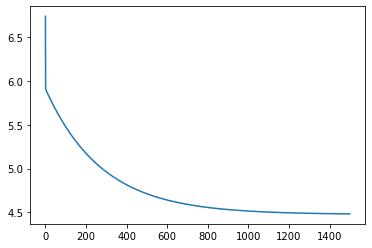

In [18]:
plt.plot(np.array([range(1500)]).T,np.array(J_history),"-")

In [19]:
### multiple variables
url = "https://raw.githubusercontent.com/suraggupta/coursera-machine-learning-solutions-python/master/Exercise1/Data/ex1data2.txt"
data = np.loadtxt(url,delimiter=",")
X = data[:,:2]
y = data[:,2]
m = y.size

In [22]:
# print some data
print("X[:,0]","X[:,1]", "y")
print("-" * 26)
for i in range(5):
    print(X[i,0], X[i,1], y[i])

X[:,0] X[:,1] y
--------------------------
2104.0 3.0 399900.0
1600.0 3.0 329900.0
2400.0 3.0 369000.0
1416.0 2.0 232000.0
3000.0 4.0 539900.0


In [28]:
X_scaled = (X-np.mean(X)) / np.std(X)

In [30]:
X_scaled[:10]

array([[ 0.96415008, -0.87391021],
       [ 0.52322557, -0.87391021],
       [ 1.22310574, -0.87391021],
       [ 0.36225314, -0.87478506],
       [ 1.74801587, -0.87303536],
       [ 0.86004291, -0.87303536],
       [ 0.46548546, -0.87391021],
       [ 0.37187649, -0.87391021],
       [ 0.33075853, -0.87391021],
       [ 0.43049145, -0.87391021]])

In [33]:
def feature_scaled(X):
    df = X.copy()

    columns = df.shape[1]
    mean=[]
    std=[]
    
    for i in range(columns):
        mean.append(np.mean(df[:,i]))
        std.append(np.std(df[:,i]))

    for i in range(columns):
        df[:,i] = (df[:,i] - mean[i]) / std[i]

    return df

    



In [34]:
X_std = feature_scaled(X)

In [36]:
X_std[:10]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517],
       [-0.01994505,  1.10220517],
       [-0.59358852, -0.22609337],
       [-0.72968575, -0.22609337],
       [-0.78946678, -0.22609337],
       [-0.64446599, -0.22609337]])

In [37]:
mu = np.zeros(X.shape[1])
mu = np.mean(X,axis=0)

In [38]:
mu

array([2000.68085106,    3.17021277])

In [39]:
def feature_solution(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    # ================================================================
    return X_norm, mu, sigma

In [41]:
X_norm, mui, sigma = feature_solution(X)

In [43]:
X_norm[:10]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517],
       [-0.01994505,  1.10220517],
       [-0.59358852, -0.22609337],
       [-0.72968575, -0.22609337],
       [-0.78946678, -0.22609337],
       [-0.64446599, -0.22609337]])

### logistic regresion

In [3]:
url = "https://raw.githubusercontent.com/suraggupta/coursera-machine-learning-solutions-python/master/Exercise2/Data/ex2data1.txt"
data = pd.read_csv(url,header=None,names=["X1","X2","Y"])
data.head(3)

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


In [4]:
# sigmoid function: in machine learning, we use sigmoid to map predictions to probabilities.
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [5]:
# We wrap the sigmoid function over the same prediction function we used in multiple linear regression
def predict(features,weights):
    """
    return a 1d array of probailitys
    that the class label == 1
    """
    z = np.dot(features,weights)
    return sigmoid(z)

In [6]:
# Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.
def cost_functions(features,labels,weigths):
    observations = len(labels)
    predictions = predict(features,weigths)
    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)
    # take the error when label = 0
    class2_cost = (1-labels)*np.log(1-predictions)
    # sum
    cost = class1_cost + class2_cost
    #average
    cost = cost.sum() / observations
    return cost


In [8]:
#Let’s compare our performance to the LogisticRegression model provided by scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn


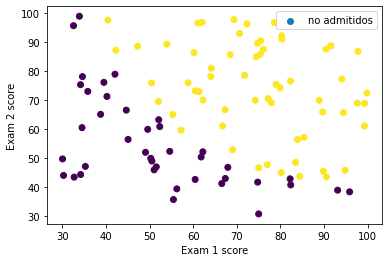

In [22]:
plt.scatter("X1","X2",c="Y",label="Y",data=data)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(("no admitidos","admitidos"))
plt.show()

In [11]:
X = data.iloc[:,:-1]
y = data["Y"]

In [12]:
y.value_counts(normalize=True)

1    0.6
0    0.4
Name: Y, dtype: float64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_train_scaled,y_train)


LogisticRegression(random_state=0)

In [19]:
model.score(X_train_scaled,y_train)

0.9125

In [20]:
clasification = sklearn.metrics.classification_report(y_train,model.predict(X_train_scaled))
print(clasification)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.92      0.94      0.93        48

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



### regularizacion

the dataset contains two tests result of microchips in a factory and we are going to use the test results to predict whether the microchips should be accepted or rejected

In [24]:
url = "https://raw.githubusercontent.com/suraggupta/coursera-machine-learning-solutions-python/master/Exercise2/Data/ex2data2.txt"
data = pd.read_csv(url,header=None)
data.head(3)

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1


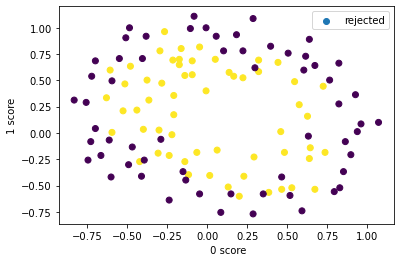

In [34]:
plt.scatter(data[0],data[1],c=data[2])
plt.xlabel(" 0 score")
plt.ylabel("1 score")
plt.legend(("rejected","admitidos"),loc=0)
plt.show()

In [35]:
import seaborn as sns

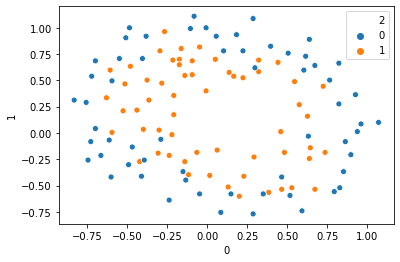

In [41]:
sns.scatterplot(x=0,y=1,hue=2,data=data,legend="full")


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn

In [44]:
X = data.iloc[:,:-1]
Y = data[2]

In [45]:
Y.value_counts()

0    60
1    58
Name: 2, dtype: int64

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [48]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(random_state=0)
model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=0)

In [49]:
model.score(X_train_scaled,y_train)

0.5106382978723404

In [50]:
clasification = sklearn.metrics.classification_report(y_train,model.predict(X_train_scaled))
print(clasification)

              precision    recall  f1-score   support

           0       0.52      0.56      0.54        48
           1       0.50      0.46      0.48        46

    accuracy                           0.51        94
   macro avg       0.51      0.51      0.51        94
weighted avg       0.51      0.51      0.51        94



Plotting the data clearly shows that the decision boundary that separates the different classes is a non-linear one. This lead to the next step of feature mapping, where we add additional polynomial terms to try and better fit the data (Normal logistic regression can only to able to fit a linear decision boundary which will not do well in this case)

In [52]:
list(range(1,7))

[1, 2, 3, 4, 5, 6]

In [75]:
from sklearn.preprocessing import PolynomialFeatures 
def polinomical(X,Y):
    scores=[]
    
    for i in range(1,7):
        pf = PolynomialFeatures(degree=i)
        X_poly = pf.fit_transform(X)
        X_train,X_test,y_train,y_test = train_test_split(X_poly,Y,test_size=0.2,random_state=0)
        
        #scaler
        scaler = sklearn.preprocessing.StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        #model
        model = LogisticRegression(random_state=0,C=0.8)
        model.fit(X_train_scaled,y_train)
        scores.append(model.score(X_train_scaled,y_train))
    #print
    df_results = pd.DataFrame(data={"degree":list(range(1,7)),"scores":scores})
    return df_results


In [76]:
df = polinomical(X,Y)

Text(0.5, 1.0, 'regresion logistica polinomial')

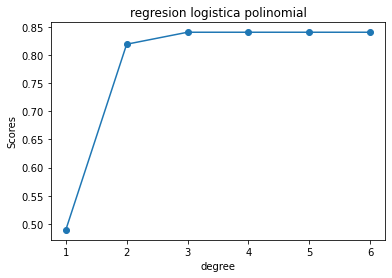

In [77]:
plt.plot("degree","scores",data=df,linestyle="-",marker='o')
plt.xlabel("degree")
plt.ylabel("Scores")
plt.title("regresion logistica polinomial")

In [78]:
## lasso y ridge
from sklearn import linear_model
def polinomical_lasso(X,Y):
    scores=[]
    
    for i in range(1,7):
        pf = PolynomialFeatures(degree=i)
        X_poly = pf.fit_transform(X)
        X_train,X_test,y_train,y_test = train_test_split(X_poly,Y,test_size=0.2,random_state=0)
        
        #scaler
        scaler = sklearn.preprocessing.StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        #model
        model = linear_model.Lasso(alpha=0.1)
        model.fit(X_train_scaled,y_train)
        scores.append(model.score(X_train_scaled,y_train))
    #print
    df_results = pd.DataFrame(data={"degree":list(range(1,7)),"scores":scores})
    return df_results

In [83]:
def plot(model=polinomical_lasso(X,Y)):
    df_lasso = model
    plt.plot("degree","scores",data=df,linestyle="-",marker='o')
    plt.xlabel("degree")
    plt.ylabel("Scores")
    plt.title("regresion logistica polinomial")

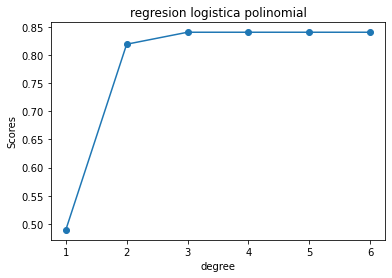

In [84]:
plot(model=polinomical_lasso(X,Y))